# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [11]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [13]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Label 0: 6903
Label 1: 7877
Label 2: 6990
Label 3: 7141
Label 4: 6824
Label 5: 6313
Label 6: 6876
Label 7: 7293
Label 8: 6825
Label 9: 6958


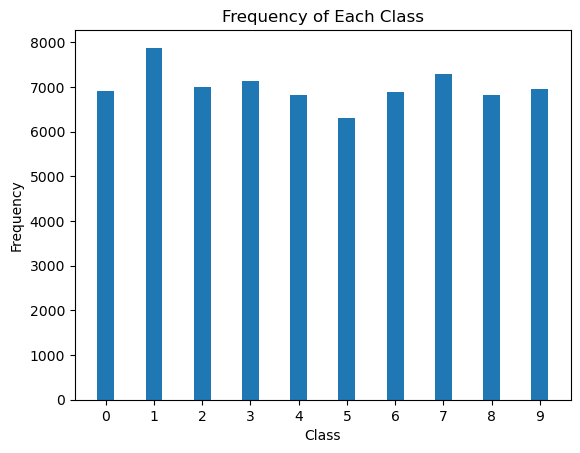

In [14]:
import numpy as np
import matplotlib.pyplot as plt


# Pisahkan atribut dan label pada dataset
x, y = mnist["data"], mnist["target"]

#  Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y.astype('int64'))

# Menampilkan jumlah data untuk setiap label
for i in range(len(label_counts)):
    print("Label {}: {}".format(i, label_counts[i]))

# Menampilkan distribusi label menggunakan bar chart
fig = plt.figure()
plt.bar(np.arange(10), label_counts, 0.35)
plt.xticks(np.arange(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of Each Class")
plt.show()




### 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.